In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import matrix_rank
from scipy.optimize import linprog # for LP
import datetime
import math
from scipy.sparse import rand
from scipy.optimize import lsq_linear
from IPython.display import display, Latex # for output compilation
#specify that all columns should be shown
pd.set_option('display.max_rows', None)

$$ \left\{\begin{matrix} 
a_{11} x_1 + a_{12} x_2 + ... +a_{n1} x_n = b_1\\ 
a_{21} x_1 + a_{22} x_2 + ... +a_{21} x_n = b_2\\ 
...\\
a_{m1} x_1 + a_{m2} x_2 + ... +a_{m1} x_n = b_m\\
\end{matrix}\right .$$



$$ A = \begin{bmatrix}a_{11} & \cdots & a_{1n} \\ \vdots & \ddots & \vdots \\ a_{m1} & \cdots & a_{mn}\end{bmatrix}, \ x = \begin{bmatrix}x_1 \\ \vdots \\ x_n\end{bmatrix}, \ B =\begin{bmatrix}b_1 \\ \vdots \\ b_n\end{bmatrix} $$

$$ Ax = b $$

$$x_j > 0$$

$$x = \alpha x + \beta $$
$$x^{(k+1)} = \alpha x^{(k)} + \beta $$
$$x^{(k+1)} = \alpha x^{(k)} + \beta $$
$$ \left \| x^{(k+1)} - x^{(k)} \right \|< \varepsilon \rightarrow min$$

### Read initial data

In [2]:
path_to_preprocessed = 'Data/Schöpfleuthnergasse/Preprocessed data/'

In [3]:
A_df = pd.read_csv(path_to_preprocessed + 'A_matrix_only_concrete.csv')
b_df = pd.read_csv(path_to_preprocessed + 'b_vector_only_concrete.csv')

In [4]:
b = np.array(b_df.betrag, dtype = float)
A = np.array(A_df, dtype = float, order='C')

In [5]:
## We can define constrains for prices( can be taken from supplier/fin.report???)
lb = 10
ub = lb + 100

In [6]:
res = lsq_linear(A, b, bounds=(lb, ub), lsmr_tol='auto', verbose=1)
res

The relative change of the cost function is less than `tol`.
Number of iterations 9, initial cost 2.2454e+09, final cost 6.8567e+08, first-order optimality 7.89e-07.


       message: The relative change of the cost function is less than `tol`.
       success: True
        status: 2
           fun: [ 7.028e+03 -6.036e+03 ...  4.936e+02  8.340e+02]
             x: [ 1.000e+01  7.427e+01 ...  6.506e+01  1.000e+01]
           nit: 9
          cost: 685669859.7363224
    optimality: 7.888832815813845e-07
   active_mask: [-1  0 ...  0 -1]
 unbounded_sol: (array([ 4.138e+03, -1.741e+03, ...,  5.826e+01, -3.038e+02]), array([], dtype=float64), 12, array([ 1.129e+03,  7.418e+02, ...,  3.540e-16,  5.900e-17]))

In [7]:
XXs = pd.DataFrame(res['x'], columns = ['x_i'])
fun = pd.DataFrame(res['fun'], columns = ['res'])

<Axes: >

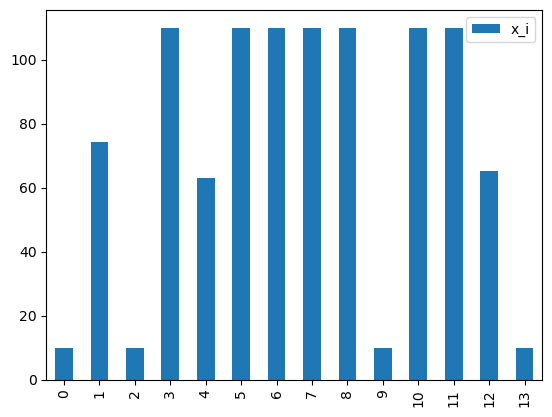

In [8]:
XXs.plot.bar()

<Axes: >

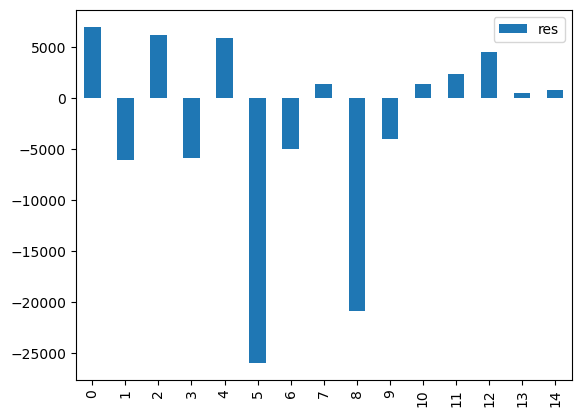

In [9]:
fun.plot.bar()

In [10]:
str_latex = '+'.join( str(round(XXs.x_i.iloc[i],3)) +'x_{' + str(i+1) + '}' for i in range(XXs['x_i'].shape[0]))

In [11]:
display(Latex('$$f(x)=' + str_latex + '$$'))

<IPython.core.display.Latex object>